<a href="https://colab.research.google.com/github/Mehrdadt1999/Customer_order_data_analysis/blob/master/Customer_order_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [15]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data.csv', index_col=0)

# EDA

In [17]:
df.head()

,CustomerID,OrderID,Date,Revenue
0,28448640,32937314,20190321,5100
1,11253773,32934605,20190321,5100
2,11257623,32943465,20190321,11706
3,11012874,32941555,20190321,5100
4,10686656,32944079,20190321,5100


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261960 entries, 0 to 261959
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CustomerID  261960 non-null  int64
 1   OrderID     261960 non-null  int64
 2   Date        261960 non-null  int64
 3   Revenue     261960 non-null  int64
dtypes: int64(4)
memory usage: 10.0 MB


In [19]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261960 entries, 0 to 261959
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  261960 non-null  int64         
 1   OrderID     261960 non-null  int64         
 2   Date        261960 non-null  datetime64[ns]
 3   Revenue     261960 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 10.0 MB


In [21]:
df.describe()

,CustomerID,OrderID,Date,Revenue
count,2.619600e+05,2.619600e+05,261960,261960.000000
mean,7.169337e+06,4.526490e+07,2019-11-03 01:34:56.674301440,6109.570595
min,4.651320e+05,3.293076e+07,2019-03-21 00:00:00,106.000000
25%,3.267469e+06,4.006175e+07,2019-08-21 00:00:00,2451.000000
50%,6.663396e+06,4.479244e+07,2019-11-09 00:00:00,5100.000000
75%,1.122706e+07,5.004593e+07,2020-01-15 00:00:00,7960.000000
max,4.654955e+07,5.885319e+07,2020-04-19 00:00:00,175200.000000
std,4.957141e+06,6.121027e+06,NaN,5646.762773


In [22]:
df["Date"].unique()

<DatetimeArray>
['2019-03-21 00:00:00', '2019-03-22 00:00:00', '2019-03-23 00:00:00',
 '2019-03-24 00:00:00', '2019-03-25 00:00:00', '2019-03-26 00:00:00',
 '2019-03-27 00:00:00', '2019-03-28 00:00:00', '2019-03-29 00:00:00',
 '2019-03-30 00:00:00',
 ...
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00', '2020-04-18 00:00:00',
 '2020-04-19 00:00:00']
Length: 396, dtype: datetime64[ns]

In [23]:
df['CustomerID'].unique().shape

(179680,)

In [24]:
df["OrderID"].unique().shape[0] == df.shape[0]

True

In [25]:
df['Revenue'].value_counts()

,count
Revenue,
5834,6959
6935,6287
5160,5925
10972,5759
730,5491
...,...
16741,1
13236,1
15131,1


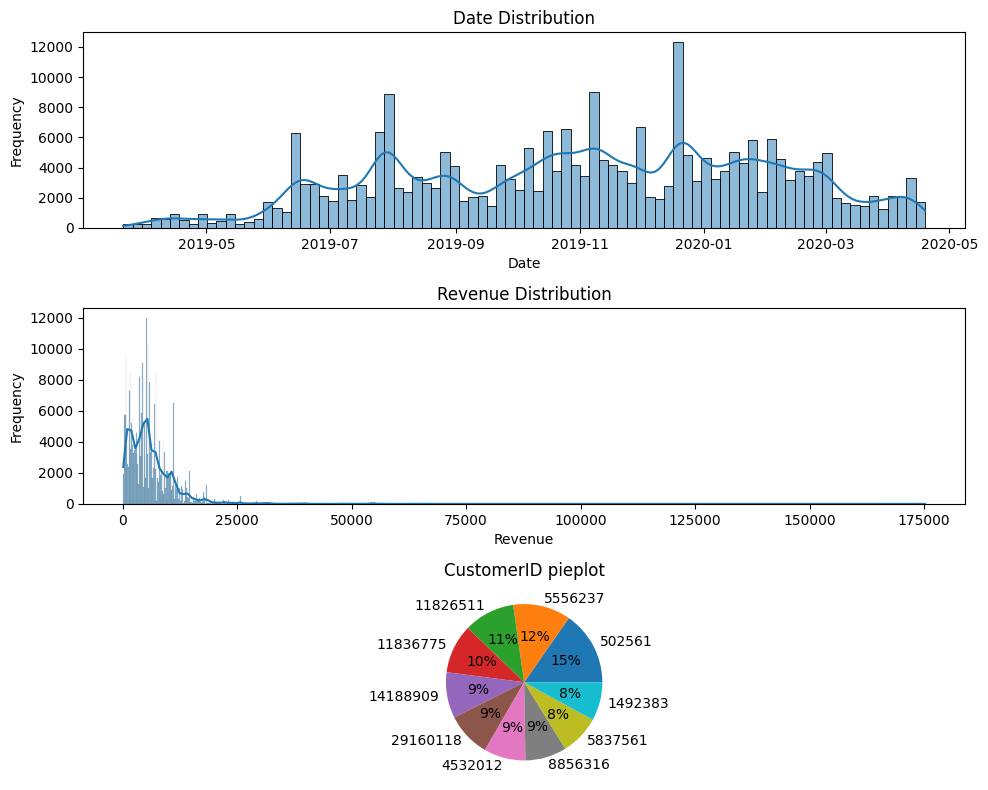

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

sns.histplot(df["Date"], kde=True, ax=axes[0])
axes[0].set_title("Date Distribution")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Frequency")

sns.histplot(df["Revenue"], kde=True, ax=axes[1])
axes[1].set_title("Revenue Distribution")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Frequency")

axes[2].pie(
    df["CustomerID"].value_counts()[:10],
    labels=df["CustomerID"].value_counts()[:10].index,
    autopct="%.0f%%",
)
axes[2].set_title("CustomerID pieplot")

plt.tight_layout()
plt.show()

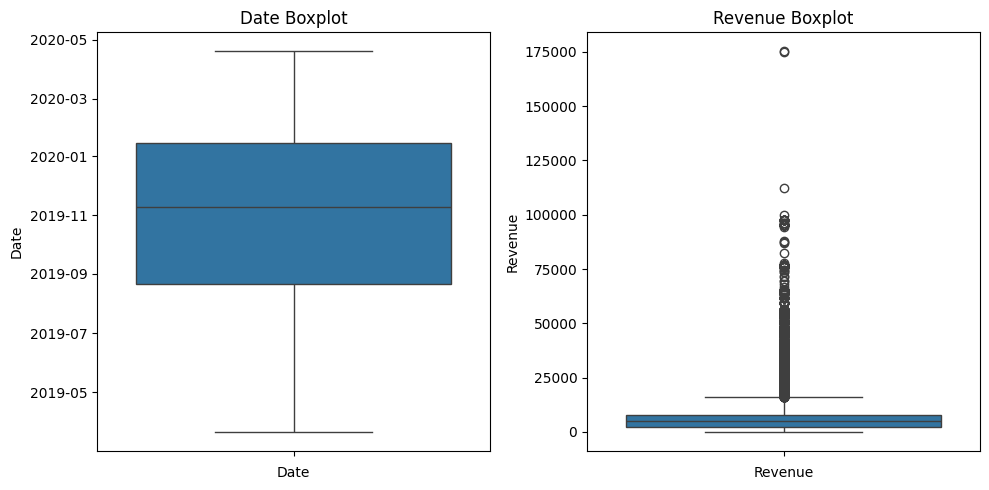

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df["Date"], ax=axes[0])
axes[0].set_title("Date Boxplot")
axes[0].set_xlabel("Date")

sns.boxplot(df["Revenue"], ax=axes[1])
axes[1].set_title("Revenue Boxplot")
axes[1].set_xlabel("Revenue")

plt.tight_layout()
plt.show()

In [28]:
df[df["Revenue"] > np.percentile(df["Revenue"], 90)]["Revenue"].describe()

,Revenue
count,25517.000000
mean,18095.900811
std,9152.480837
min,11570.000000
25%,13174.000000
50%,14642.000000
75%,18320.000000
max,175200.000000


In [29]:
df[df["Revenue"] > np.percentile(df["Revenue"], 90)]["Date"].describe()

,Date
count,25517
mean,2019-11-14 20:02:25.032723456
min,2019-03-21 00:00:00
25%,2019-08-19 00:00:00
50%,2019-11-30 00:00:00
75%,2020-02-04 00:00:00
max,2020-04-19 00:00:00


In [30]:
most_frequent_person = df[df['CustomerID'] == 502561]

In [31]:
most_frequent_person

,CustomerID,OrderID,Date,Revenue
5986,502561,35011640,2019-05-13,10972
6048,502561,34970613,2019-05-13,10972
6049,502561,34970867,2019-05-13,10972
8310,502561,35843019,2019-05-31,9871
11228,502561,36202016,2019-06-10,10605
...,...,...,...,...
257679,502561,57763562,2020-04-10,10972
258201,502561,57992101,2020-04-12,18311
258318,502561,57992324,2020-04-12,18311
258333,502561,57991900,2020-04-12,18311


In [32]:
most_frequent_person[["Date", "Revenue"]].describe()

,Date,Revenue
count,231,231.000000
mean,2019-12-01 18:04:40.519480576,14548.411255
min,2019-05-13 00:00:00,316.000000
25%,2019-09-25 00:00:00,8968.500000
50%,2019-12-04 00:00:00,10972.000000
75%,2020-02-19 00:00:00,17560.000000
max,2020-04-14 00:00:00,56110.000000
std,NaN,8621.161961


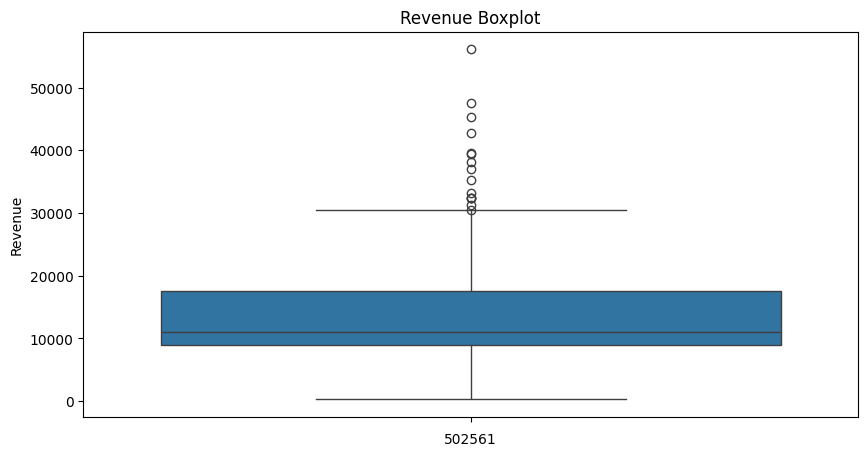

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(most_frequent_person["Revenue"])
plt.title("Revenue Boxplot")
plt.xlabel("502561")
plt.show()

# Calculation of monthly key indicators

In [63]:
df['Month'] = df['Date'].dt.to_period('M')
df

,CustomerID,OrderID,Date,Revenue,Month
0,28448640,32937314,2019-03-21,5100,2019-03
1,11253773,32934605,2019-03-21,5100,2019-03
2,11257623,32943465,2019-03-21,11706,2019-03
3,11012874,32941555,2019-03-21,5100,2019-03
4,10686656,32944079,2019-03-21,5100,2019-03
...,...,...,...,...,...
261955,14814009,58778867,2020-04-19,8760,2020-04
261956,17043123,58761937,2020-04-19,5240,2020-04
261957,2853558,58757250,2020-04-19,8760,2020-04
261958,3114170,58818638,2020-04-19,11920,2020-04


In [65]:
customer_count = df.groupby('Month')['CustomerID'].nunique()
customer_count

,CustomerID
Month,
2019-03,531
2019-04,3312
2019-05,3431
2019-06,15413
2019-07,23194
2019-08,19437
2019-09,14498
2019-10,25285
2019-11,28401


In [74]:
order_count = df.groupby("Month")["OrderID"].count()
order_count

,OrderID
Month,
2019-03,572
2019-04,3958
2019-05,3809
2019-06,17556
2019-07,26788
2019-08,22570
2019-09,16236
2019-10,29813
2019-11,32708


In [73]:
aov_value = df.groupby("Month")["Revenue"].mean()
aov_value

,Revenue
Month,
2019-03,5885.479021
2019-04,6073.112683
2019-05,6745.508532
2019-06,6461.452438
2019-07,5568.359041
2019-08,5792.550510
2019-09,5107.107046
2019-10,5675.472143
2019-11,5754.326342


In [100]:
frequency = order_count/customer_count
frequency

,0
Month,
2019-03,1.077213
2019-04,1.195048
2019-05,1.110172
2019-06,1.139038
2019-07,1.154954
2019-08,1.161187
2019-09,1.119879
2019-10,1.179079
2019-11,1.151650


In [87]:
frequency = df.groupby('Month')['CustomerID'].value_counts().groupby('Month').mean()
frequency

,count
Month,
2019-03,1.077213
2019-04,1.195048
2019-05,1.110172
2019-06,1.139038
2019-07,1.154954
2019-08,1.161187
2019-09,1.119879
2019-10,1.179079
2019-11,1.151650


In [97]:
total_revenue = df.groupby("Month")["Revenue"].sum()
total_revenue

,Revenue
Month,
2019-03,3366494
2019-04,24037380
2019-05,25693642
2019-06,113437259
2019-07,149165202
2019-08,130737865
2019-09,82918990
2019-10,169202851
2019-11,188212506


In [98]:
month_most_order = order_count.idxmax()
month_most_order

Period('2019-11', 'M')

In [99]:
month_most_revenue = total_revenue.idxmax()
month_most_revenue

Period('2019-11', 'M')

In [101]:
result = pd.DataFrame([customer_count, order_count, aov_value, frequency, total_revenue],
                      index=["customer_count", "order_count", "aov_value", "frequency", "total_revenue"]).T
result

,customer_count,order_count,aov_value,frequency,total_revenue
Month,,,,,
2019-03,531.0,572.0,5885.479021,1.077213,3366494.0
2019-04,3312.0,3958.0,6073.112683,1.195048,24037380.0
2019-05,3431.0,3809.0,6745.508532,1.110172,25693642.0
2019-06,15413.0,17556.0,6461.452438,1.139038,113437259.0
2019-07,23194.0,26788.0,5568.359041,1.154954,149165202.0
2019-08,19437.0,22570.0,5792.550510,1.161187,130737865.0
2019-09,14498.0,16236.0,5107.107046,1.119879,82918990.0
2019-10,25285.0,29813.0,5675.472143,1.179079,169202851.0
2019-11,28401.0,32708.0,5754.326342,1.151650,188212506.0
